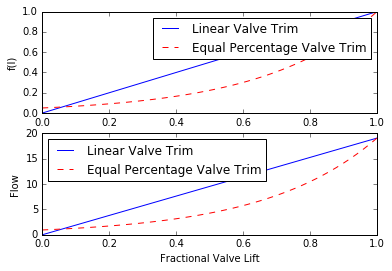

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Lift functions for two different valve trim types
def f_lin(x):
    return x    # linear valve trim

def f_ep(x):
    R = 20
    return R**(x-1)  # equal percentage valve trim (R=20-50)

lift = np.linspace(0,1)

plt.figure(1)
plt.title('Valve Performance - Not Installed')
plt.subplot(2,1,1)
plt.plot(lift,f_lin(lift),'b-')
plt.plot(lift,f_ep(lift),'r--')
plt.ylabel('f(l)')
plt.legend(['Linear Valve Trim','Equal Percentage Valve Trim'])

g_s = 1.1
def q(x,f,Cv,DPv):
    return Cv*f(x)*np.sqrt(DPv/g_s)

## Intrinsic valve performance
# no process equipment - all pressure drop is across valve
DPt = 100 # total pressure generated by pump (constant)
Cv = 2
flow_lin = q(lift,f_lin,Cv,DPt)
flow_ep = q(lift,f_ep,Cv,DPt)

plt.subplot(2,1,2)
plt.plot(lift,flow_lin,'b-')
plt.plot(lift,flow_ep,'r--')
plt.ylabel('Flow')
plt.legend(['Linear Valve Trim','Equal Percentage Valve Trim'],loc='best')
plt.xlabel('Fractional Valve Lift')
plt.show()


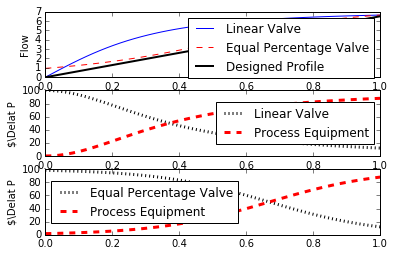

In [4]:
# total pressure drop
DPt = 100
Cv = 2.0
gs = 1.1

def f_lin(x):
    return x
def f_ep(x):
    R = 20
    return R**(x-1)

def DPe(q):
    C1 = 2.0
    return C1*q**2

def q(x,f,Cv):
    return np.sqrt((100*Cv**2*f(x)**2)/(gs+2.0*Cv**2*f(x)**2))

flow_lin = q(lift,f_lin,Cv)
flow_ep = q(lift,f_ep,Cv)

plt.figure(2)
plt.title('Valve Performance - Installed')
plt.subplot(3,1,1)
plt.plot(lift,flow_lin,'b-',label='Linear Valve')
plt.plot(lift,flow_ep,'r--',label='Equal Percentage Valve')
plt.plot([0,1],[0,6.5],'k-',linewidth=2,label='Designed Profile')
plt.legend(loc='best')
plt.ylabel('Flow')

plt.subplot(3,1,2)
plt.plot(lift,DPt-DPe(flow_lin),'k:',linewidth=3)
plt.plot(lift,DPe(flow_lin),'r--',linewidth=3)
plt.legend(['Linear Valve','Process Equipment'],loc = 'best')
plt.ylabel(r'$\Delat P')

plt.subplot(3,1,3)
plt.plot(lift,DPt-DPe(flow_ep),'k:',linewidth=3)
plt.plot(lift,DPe(flow_ep),'r--',linewidth=3)
plt.legend(['Equal Percentage Valve','Process Equipment'],loc = 'best')
plt.ylabel(r'$\Delat P')

plt.show()


    

In [18]:
from bokeh.plotting import figure, output_notebook, show
# total pressure drop
DPt = 100
Cv = 2.0
gs = 1.1

def f_lin(x):
    return x
def f_ep(x):
    R = 20
    return R**(x-1)

def DPe(q):
    C1 = 2.0
    return C1*q**2

def q(x,f,Cv):
    return np.sqrt((100*Cv**2*f(x)**2)/(gs+2.0*Cv**2*f(x)**2))

flow_lin = q(lift,f_lin,Cv)
flow_ep = q(lift,f_ep,Cv)

output_notebook()

p1 = figure(plot_width=400, plot_height=400,x_range=[0.0,1.0],y_range=[0.0,10.0],title='Flow',
          x_axis_label='Lift',y_axis_label='Flow')

p2 = figure(plot_width=400,plot_height=400,x_range=[0.0,1.0],y_range=[0.0,120.0],title='Pressure Drop',
          x_axis_label='Lift',y_axis_label='Pressure Drop')

p3 = figure(plot_width=400,plot_height=400,x_range=[0.0,1.0],y_range=[0.0,120.0],title='Pressure Drop',
          x_axis_label='Lift',y_axis_label=r'$\Delta P$')
# add some renderers
p1.line(lift,flow_lin,legend='Linear Valve',line_color='red',line_width=3)
p1.line(lift,flow_ep,legend='Equal Percentage Valve')
p1.line([0,1],[0,6.5],legend='Designed',line_color='black',line_dash = '4 4')

p2.line(lift,DPe(flow_lin),legend = 'Linear Valve',line_color = 'red',line_width=3)
p2.line(lift,DPt-DPe(flow_lin),legend = 'Process Equipment',line_color = 'blue',line_width=3,line_dash='4 4')

p3.line(lift,DPe(flow_ep),legend = 'Equal Percentage Valve',line_color = 'red',line_width=3)
p3.line(lift,DPt-DPe(flow_ep),legend = 'Process Equipment',line_color = 'blue',line_width=3,line_dash='4 4')

show(p1)
show(p2)
show(p3)

Loading BokehJS ...